Problem:

Solve the following: 

$$
  u_x + xu_y= 0
$$

for u(x,y), using method of characteristics, where the initial condition is: 

$$
  u(0,y) = \sin(y)
$$

Solution:

$$
  \frac{dx}{1} = \frac{dy}{x}
$$

which leads to the characteristic curves

$$
  y - \frac{x^2}{2} = C
$$

where C is a constant. Therefore, the general solution is

$$
  u(x,y) = \phi(y - \frac{x^2}{2})
$$

plugging the general solution into the boundary condition, we see that

$$
  u(x,y) = \sin(y - \frac{x^2}{2})
$$

Next, we will plot this function and sketch a normal vector and the tangent vectors at a particular point. We will plot over the range of -1 to 2 for both the x and y directions, and the point in which we draw the vectors will be at x = 0.0 and y = 1.0

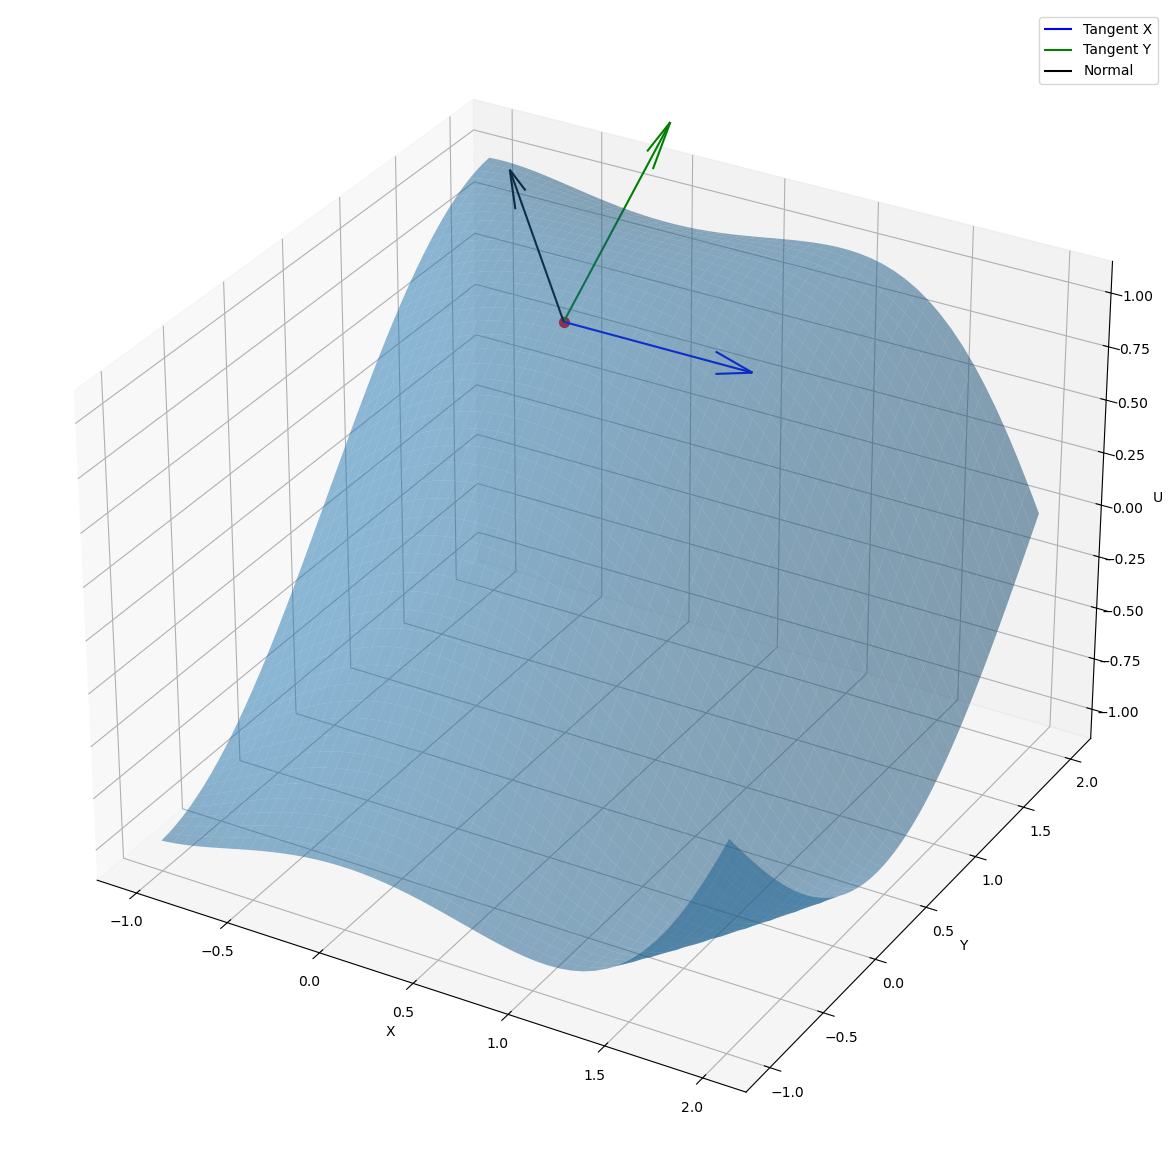

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface function
def surface_function(x, y):
    return np.sin(y-0.5*x**2)

# Create the meshgrid
x = np.linspace(-1, 2, 50)
y = np.linspace(-1, 2, 50)
X, Y = np.meshgrid(x, y)
Z = surface_function(X, Y)

# Calculate partial derivatives (for tangent plane)
def derivative_x(f, x, y, h=0.001):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def derivative_y(f, x, y, h=0.001):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)

# Choose a point on the surface
point_x = 0
point_y = 1
point_z = surface_function(point_x, point_y)

# Calculate tangent vectors
tangent_x = np.array([1, 0, derivative_x(surface_function, point_x, point_y)])
tangent_y = np.array([0, 1, derivative_y(surface_function, point_x, point_y)])

# Calculate normal vector (perpendicular)
normal_vector = np.cross(tangent_x, tangent_y)

# Normalize the normal vector
normal_vector = normal_vector / np.linalg.norm(normal_vector)

# Plot the surface
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)

# Plot the point
ax.scatter(point_x, point_y, point_z, color='red', s=50)

# Plot tangent vectors
ax.quiver(point_x, point_y, point_z, tangent_x[0], tangent_x[1], tangent_x[2], color='blue', length=1, arrow_length_ratio=0.2, label='Tangent X')
ax.quiver(point_x, point_y, point_z, tangent_y[0], tangent_y[1], tangent_y[2], color='green', length=1, arrow_length_ratio=0.2, label='Tangent Y')

# Plot normal vector
ax.quiver(point_x, point_y, point_z, normal_vector[0], normal_vector[1], normal_vector[2], color='black', length=1, arrow_length_ratio=0.2, label='Normal')


# Set labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
ax.legend()


# Show the plot
plt.show()